## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 函数定义

In [59]:
function = lambda x: 5* x**4 + 4* x**3 + 3* x**2 + 2*x + 1

## 数据采集

In [60]:
np.random.seed(42)

# 生成1000个随机的x值，x在-10到10之间
x_values = np.random.uniform(-1, 1, 1000)
y_values = function(x_values)

# 将x和y组合成数据集
data = np.column_stack((x_values, y_values))

# 打乱数据
np.random.shuffle(data)

# 划分训练集和测试集
train_data = data[:800]
test_data = data[800:]

# 提取训练集和测试集的x和y
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

# 打印训练集和测试集的形状以验证
print("训练集形状:", x_train.shape, y_train.shape)
print("测试集形状:", x_test.shape, y_test.shape)

训练集形状: (800,) (800,)
测试集形状: (200,) (200,)


## 模型描述

In [61]:
class MyModel:
    def __init__(self, input_size, hidden_size, output_size):
        """
        初始化神经网络模型
        :param input_size: 输入维度
        :param hidden_size: 隐藏层维度
        :param output_size: 输出维度
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, hidden_size) * 0.01
        self.b2 = np.zeros((1, hidden_size))
        self.W3 = np.random.randn(hidden_size, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))
    
    def relu(self, x):
        """ReLU激活函数"""
        return np.maximum(x, 0)
    
    def forward(self, x):
        """前向传播"""
        h1 = self.relu(np.matmul(x, self.W1) + self.b1)
        h2 = self.relu(np.matmul(h1, self.W2) + self.b2)
        output = np.matmul(h2, self.W3) + self.b3
        return output, h1, h2
    
    def compute_loss(self, y_pred, y_true):
        """计算均方误差损失"""
        return np.mean((y_pred - y_true)**2)
    
    def compute_gradients(self, x, y_true, y_pred, h1, h2):
        """计算梯度"""
        # 计算输出层的梯度
        dloss = 2 * (y_pred - y_true) / x.shape[0]  # 均方误差的梯度
        dW3 = np.dot(h2.T, dloss)  # 输出层权重梯度
        db3 = np.sum(dloss, axis=0, keepdims=True)  # 输出层偏置梯度

        # 计算第二隐藏层的梯度
        dh2 = np.dot(dloss, self.W3.T)  # 从输出层反向传播到h2
        drelu2 = (h2 > 0).astype(float) * dh2  # ReLU梯度
        dW2 = np.dot(h1.T, drelu2)
        db2 = np.sum(drelu2, axis=0, keepdims=True)

        # 计算第一隐藏层的梯度
        dh1 = np.dot(drelu2, self.W2.T)  # 从h2反向传播到h1
        drelu1 = (h1 > 0).astype(float) * dh1  # ReLU梯度
        dW1 = np.dot(x.T, drelu1)
        db1 = np.sum(drelu1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2, dW3, db3
    
    def train(self, x_train, y_train, learning_rate=0.003, num_epochs=10000):
        """训练模型"""
        for epoch in range(num_epochs):
            # 前向传播
            y_pred, h1, h2 = self.forward(x_train)
            
            # 计算损失
            loss = self.compute_loss(y_pred, y_train)
            
            # 计算梯度
            dW1, db1, dW2, db2, dW3, db3 = self.compute_gradients(x_train, y_train, y_pred, h1, h2)
            
            # 更新权重
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W3 -= learning_rate * dW3
            self.b3 -= learning_rate * db3
            
            if (epoch + 1) % 1000 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
    
    def test(self, x_test, y_test):
        """在测试集上评估模型"""
        y_pred, _, _ = self.forward(x_test)
        test_loss = self.compute_loss(y_pred, y_test)
        print(f'Test Loss: {test_loss:.4f}')
        return y_pred


## 训练模型

In [62]:
model = MyModel(input_size=1, hidden_size=128, output_size=1)
model.train(x_train.reshape(-1,1), y_train.reshape(-1,1))

Epoch [1000/10000], Loss: 0.8593
Epoch [2000/10000], Loss: 0.3964
Epoch [3000/10000], Loss: 0.3525
Epoch [4000/10000], Loss: 0.2584
Epoch [5000/10000], Loss: 0.2128
Epoch [6000/10000], Loss: 0.1924
Epoch [7000/10000], Loss: 0.1822
Epoch [8000/10000], Loss: 0.1748
Epoch [9000/10000], Loss: 0.1677
Epoch [10000/10000], Loss: 0.1596


## 测试模型（拟合效果）

Test Loss: 0.1739


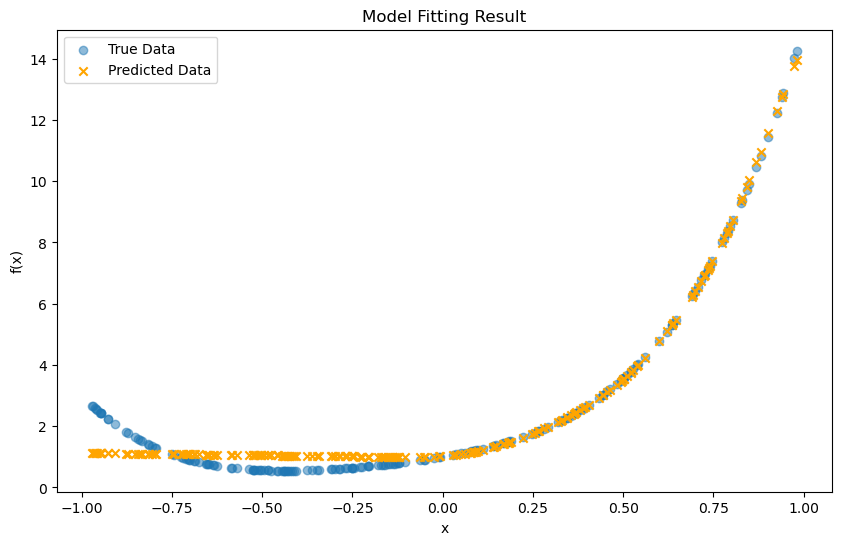

In [63]:
def plot_results(x_test, y_test, y_pred):
    """绘制拟合效果"""
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, label='True Data', alpha=0.5)
    plt.scatter(x_test, y_pred, color='orange', marker='x', label='Predicted Data')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Model Fitting Result')
    plt.show()
    
# 测试模型
y_pred = model.test(x_test.reshape(-1, 1), y_test.reshape(-1, 1))

# 绘制拟合效果
plot_results(x_test, y_test, y_pred)